## Import Libraries

In [1]:
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

note :  regression - linear activation function (maybe use ReLu instead, bcoz we donr have Y is a negative number)


note
sigmoid : y = 0 / 1
linear : y = + / -
relu : y = 0 / +

so, for dense layer maybe we use relu activation func too
conclusion : hidden layers = relu or linear, output layers = relu

## Import Dataset

In [2]:
df = pd.read_csv(r'../Dataset/dataset.csv')

df.head()

,Laptop_Index,Link_References,Laptop_Name,User_Rating,Price_in_Rupee,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,...,Laptop_Company,Storage_Capacity,Processor,CPU_Rank,Battery_Lifetime_in_Hrs,GPU,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized,Image_Link
0,1,https://www.flipkart.com/asus-rog-strix-scar-1...,asus rog strix scar 15 core i9 12th gen - (32 ...,NaN,229990,1,8.0,1,1,32,...,1,1000,intel core i9 12th gen,4,4.0,nvidia geforce rtx 3070 ti,168.00,7,1,https://rukminim2.flixcart.com/image/416/416/l...
1,2,https://www.flipkart.com/hp-victus-ryzen-7-oct...,hp victus ryzen 7 octa core 5800h - (16 gb/512...,NaN,104091,1,4.0,2,1,16,...,2,512,amd ryzen 7 octa core,64,4.0,nvidia geforce rtx 3050,72.60,4,2,https://rukminim2.flixcart.com/image/416/416/k...
2,3,https://www.flipkart.com/lenovo-ideapad-gaming...,lenovo ideapad gaming 3i ryzen 7 octa core r7-...,NaN,87717,1,4.0,2,1,16,...,3,512,amd ryzen 7 octa core 5th gen,24,4.0,nvidia geforce rtx 3050,72.60,4,2,https://rukminim2.flixcart.com/image/416/416/l...
3,4,https://www.flipkart.com/lenovo-yoga-slim-7-co...,lenovo yoga slim 7 core i5 11th gen - (16 gb/5...,NaN,75990,2,0.0,1,1,16,...,3,512,intel core i5 11th gen,108,4.5,intel hd,4.23,4,3,https://rukminim2.flixcart.com/image/416/416/l...
4,5,https://www.flipkart.com/lenovo-yoga-slim-7-co...,lenovo yoga slim 7 core i7 11th gen - (16 gb/5...,NaN,78395,2,0.0,1,1,16,...,3,512,intel core i7 11th gen,61,4.5,iris xe,17.50,4,4,https://rukminim2.flixcart.com/image/416/416/x...


## Data Preprocessing

In [3]:
df.columns

Index(['Laptop_Index', 'Link_References', 'Laptop_Name', 'User_Rating',
       'Price_in_Rupee', 'Laptop_Type', 'Dedicated_GPU_in_GB',
       'Processor_Brand', 'Storage_Type', 'RAM_in_GB', 'RAM_Type',
       'Memory_Type', 'OS', 'Touchscreen_Features', 'Screen_Size_in_Inch',
       'Weight_in_Kg', 'Refresh_Rate', 'Screen_Resolution', 'Laptop_Company',
       'Storage_Capacity', 'Processor', 'CPU_Rank', 'Battery_Lifetime_in_Hrs',
       'GPU', 'GPU_Benchmark_Score', 'RAM_Type_Tokenized',
       'GPU_Processor_Tokenized', 'Image_Link'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Laptop_Index             983 non-null    int64  
 1   Link_References          983 non-null    object 
 2   Laptop_Name              983 non-null    object 
 3   User_Rating              689 non-null    float64
 4   Price_in_Rupee           983 non-null    int64  
 5   Laptop_Type              983 non-null    int64  
 6   Dedicated_GPU_in_GB      983 non-null    float64
 7   Processor_Brand          983 non-null    int64  
 8   Storage_Type             983 non-null    int64  
 9   RAM_in_GB                983 non-null    int64  
 10  RAM_Type                 983 non-null    object 
 11  Memory_Type              983 non-null    int64  
 12  OS                       983 non-null    int64  
 13  Touchscreen_Features     983 non-null    int64  
 14  Screen_Size_in_Inch      9

In [5]:
X = df.drop(columns=[
    'Laptop_Index', 
    'Link_References',
    'Laptop_Name',
    'User_Rating',
    'RAM_Type',
    'Processor',
    'GPU',
    'Image_Link',
    'Price_in_Rupee'
])

y = df['Price_in_Rupee']


In [6]:
X

,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,Memory_Type,OS,Touchscreen_Features,Screen_Size_in_Inch,Weight_in_Kg,Refresh_Rate,Screen_Resolution,Laptop_Company,Storage_Capacity,CPU_Rank,Battery_Lifetime_in_Hrs,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized
0,1,8.0,1,1,32,1,1,0,15.6,2.300000,60,1440,1,1000,4,4.0,168.00,7,1
1,1,4.0,2,1,16,0,1,0,16.1,2.480000,60,1080,2,512,64,4.0,72.60,4,2
2,1,4.0,2,1,16,0,1,0,15.6,2.250000,60,1080,3,512,24,4.0,72.60,4,2
3,2,0.0,1,1,16,0,1,1,14.0,1.500672,60,1080,3,512,108,4.5,4.23,4,3
4,2,0.0,1,1,16,0,1,0,14.0,1.360000,60,1080,3,512,61,4.5,17.50,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,2,0.0,1,1,8,1,1,0,14.0,1.100000,60,1080,13,512,187,4.5,5.05,4,7
979,3,0.0,1,1,16,0,1,1,13.3,1.490000,60,1080,2,512,97,5.0,70.90,2,23
980,3,0.0,2,1,8,0,1,1,13.3,1.320000,60,1080,2,512,87,5.0,102.00,4,5
981,4,0.0,1,0,4,0,2,1,14.0,1.460000,60,720,2,64,745,4.5,2.13,4,24


In [7]:
y

0      229990
1      104091
2       87717
3       75990
4       78395
        ...  
978     53990
979    239759
980     85555
981     26990
982     44590
Name: Price_in_Rupee, Length: 983, dtype: int64

###### cleaning data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X

,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,Memory_Type,OS,Touchscreen_Features,Screen_Size_in_Inch,Weight_in_Kg,Refresh_Rate,Screen_Resolution,Laptop_Company,Storage_Capacity,CPU_Rank,Battery_Lifetime_in_Hrs,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized
0,1,8.0,1,1,32,1,1,0,15.6,2.300000,60,1440,1,1000,4,4.0,168.00,7,1
1,1,4.0,2,1,16,0,1,0,16.1,2.480000,60,1080,2,512,64,4.0,72.60,4,2
2,1,4.0,2,1,16,0,1,0,15.6,2.250000,60,1080,3,512,24,4.0,72.60,4,2
3,2,0.0,1,1,16,0,1,1,14.0,1.500672,60,1080,3,512,108,4.5,4.23,4,3
4,2,0.0,1,1,16,0,1,0,14.0,1.360000,60,1080,3,512,61,4.5,17.50,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,2,0.0,1,1,8,1,1,0,14.0,1.100000,60,1080,13,512,187,4.5,5.05,4,7
979,3,0.0,1,1,16,0,1,1,13.3,1.490000,60,1080,2,512,97,5.0,70.90,2,23
980,3,0.0,2,1,8,0,1,1,13.3,1.320000,60,1080,2,512,87,5.0,102.00,4,5
981,4,0.0,1,0,4,0,2,1,14.0,1.460000,60,720,2,64,745,4.5,2.13,4,24


In [10]:
y

0      229990
1      104091
2       87717
3       75990
4       78395
        ...  
978     53990
979    239759
980     85555
981     26990
982     44590
Name: Price_in_Rupee, Length: 983, dtype: int64

In [11]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.values.reshape(-1, 1)  # Convert y_train to 2D
y_test = y_test.values.reshape(-1, 1)    # Convert y_test to 2D

# Now apply the StandardScaler
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [12]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [13]:
X_train.shape

TensorShape([786, 19])

## Model ML

In [14]:
model = Sequential(
    [   
        tf.keras.Input(shape=(19,)),
        Dense(units = 15, activation = 'relu', name = "Layer_1"),        # layer 1
        Dense(units = 10, activation = 'relu', name = "Layer_2"),         # layer 2
        Dense(units = 1)                                                   # output layers
    ], name="GoLap_Prediction"
)

In [15]:
model.summary()

Model: "GoLap_Prediction"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer_1 (Dense)                 │ (None, 15)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_2 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471 (1.84 KB)

 Trainable params: 471 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
[layer1, layer2, layer3] = model.layers

In [17]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (19, 15), b1 shape = (15,)
W2 shape = (15, 10), b2 shape = (10,)
W3 shape = (10, 1), b3 shape = (1,)


In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=MeanSquaredError
)

In [19]:
history = model.fit(
    X_train,  
    y_train,
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test, y_test)
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8995 - val_loss: 0.5306
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4846 - val_loss: 0.4013
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4017 - val_loss: 0.3263
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3005 - val_loss: 0.2863
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2923 - val_loss: 0.2611
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2851 - val_loss: 0.2440
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2328 - val_loss: 0.2326
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2290 - val_loss: 0.2221
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2613 - val_loss: 0.2138
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1647 - val_loss: 0.2082
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1933 - val_loss: 0.2008
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2635 - val_lo

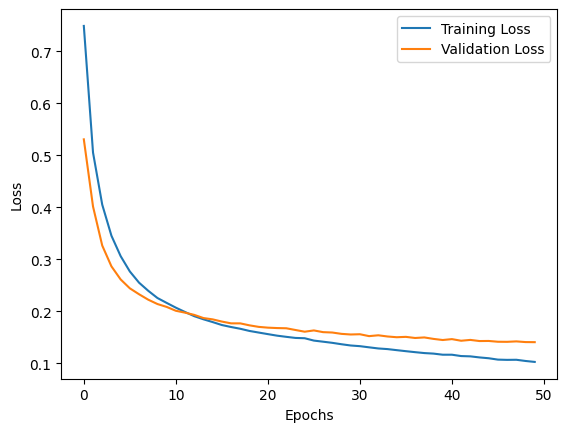

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1417 
Test Loss: 0.14038927853107452


In [22]:
y_test = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [23]:
y_ori = scaler.inverse_transform(y_test)

In [27]:
print(X_test)

tf.Tensor(
[[-0.13247459 -0.6127307  -0.5995702  ... -0.87605584 -0.34113836
  -0.31655154]
 [-0.13247459 -0.6127307  -0.5995702  ... -0.5828273  -0.34113836
  -0.21977614]
 [-1.1842425   1.1574643  -0.5995702  ...  0.41579822 -0.34113836
  -0.4133269 ]
 ...
 [-0.13247459 -0.6127307  -0.5995702  ... -0.87605584 -0.34113836
  -0.31655154]
 [-1.1842425   2.0425618   1.1654567  ...  2.1139328  -0.34113836
   0.16732536]
 [ 1.9710611  -0.6127307  -0.5995702  ... -0.8953689  -0.34113836
  -0.70365304]], shape=(197, 19), dtype=float32)


In [24]:
print(y_ori)

[[ 53975.348 ]
 [ 71314.516 ]
 [ 72574.984 ]
 [ 77107.01  ]
 [ 69789.68  ]
 [ 72669.14  ]
 [173018.02  ]
 [ 69323.2   ]
 [ 69323.2   ]
 [ 40669.58  ]
 [ 92490.71  ]
 [118857.16  ]
 [ 69323.2   ]
 [ 70395.37  ]
 [ 70465.38  ]
 [ 82798.336 ]
 [ 69303.17  ]
 [ 78658.914 ]
 [ 70129.67  ]
 [ 83897.65  ]
 [ 70805.375 ]
 [103222.5   ]
 [ 68886.62  ]
 [ 69323.2   ]
 [ 81936.664 ]
 [ 46000.41  ]
 [ 62837.688 ]
 [ 71456.    ]
 [104289.19  ]
 [ 65150.043 ]
 [ 32142.24  ]
 [ 69866.05  ]
 [ 70116.086 ]
 [ 80952.22  ]
 [100482.3   ]
 [ 73295.17  ]
 [ 59717.305 ]
 [ 69323.2   ]
 [ 39026.832 ]
 [ 65377.35  ]
 [ 65039.25  ]
 [161675.92  ]
 [ 77172.78  ]
 [ 70512.56  ]
 [ 77354.12  ]
 [ 71766.53  ]
 [ 46000.41  ]
 [ 69323.2   ]
 [ 69631.8   ]
 [ 70395.37  ]
 [ 68473.4   ]
 [ 70130.66  ]
 [ 70116.086 ]
 [ 72233.555 ]
 [ 82403.375 ]
 [ 71718.49  ]
 [155226.36  ]
 [ 77096.484 ]
 [ 69323.2   ]
 [ 51759.324 ]
 [ 69323.2   ]
 [ 71089.22  ]
 [ 54392.777 ]
 [ 69543.3   ]
 [ 68375.336 ]
 [ 69744.23  ]
 [ 65964.4

In [28]:
# Inverse scaling untuk nilai asli (y_test) dan prediksi (y_test)
y_test_original = scaler.inverse_transform(y_test)  # y_test asli setelah inverse scaling
y_pred_original = scaler.inverse_transform(model.predict(X_test))  # Prediksi setelah inverse scaling

# Buat DataFrame untuk membandingkan nilai asli dan prediksi
comparison_df = pd.DataFrame({
    'Actual Price': y_test_original.flatten(),  # Flatten untuk mengubah ke 1D
    'Predicted Price': y_pred_original.flatten()
})

print(comparison_df.head())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
   Actual Price  Predicted Price
0  53975.347656     53975.347656
1  71314.515625     71314.515625
2  72574.984375     72574.984375
3  77107.007812     77107.007812
4  69789.679688     69789.679688


In [29]:
for i in range(10):  # Tampilkan 10 prediksi pertama
    print(f"Actual Price: {y_test_original[i][0]}, Predicted Price: {y_pred_original[i][0]}")

Actual Price: 53975.34765625, Predicted Price: 53975.34765625
Actual Price: 71314.515625, Predicted Price: 71314.515625
Actual Price: 72574.984375, Predicted Price: 72574.984375
Actual Price: 77107.0078125, Predicted Price: 77107.0078125
Actual Price: 69789.6796875, Predicted Price: 69789.6796875
Actual Price: 72669.140625, Predicted Price: 72669.140625
Actual Price: 173018.015625, Predicted Price: 173018.015625
Actual Price: 69323.203125, Predicted Price: 69323.203125
Actual Price: 69323.203125, Predicted Price: 69323.203125
Actual Price: 40669.578125, Predicted Price: 40669.578125


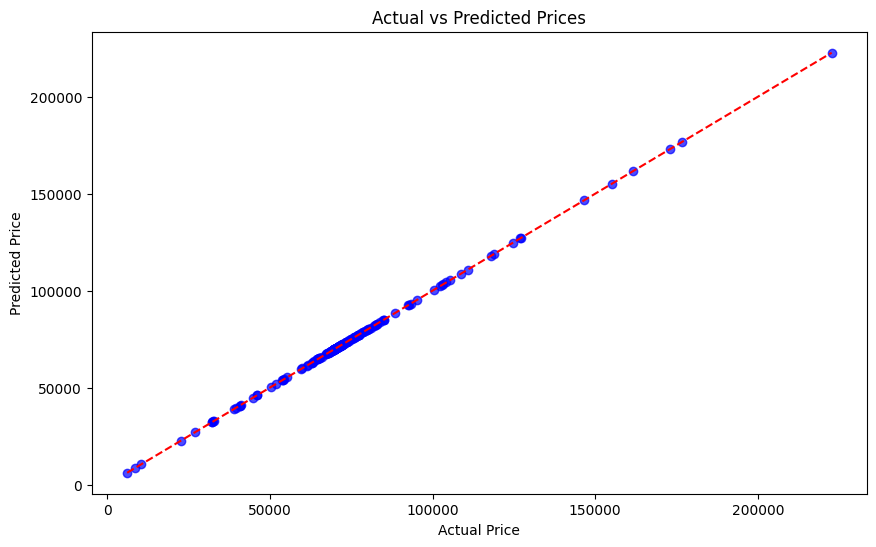

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual Price'], comparison_df['Predicted Price'], alpha=0.7, color='blue')
plt.plot([comparison_df['Actual Price'].min(), comparison_df['Actual Price'].max()],
         [comparison_df['Actual Price'].min(), comparison_df['Actual Price'].max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [25]:
# model.save('model.h5')